**Nom du / des étudiant(s)** : Mamisoa RANDRIANARIMANANA- Xianxiang ZHANG

> Bloc en retrait




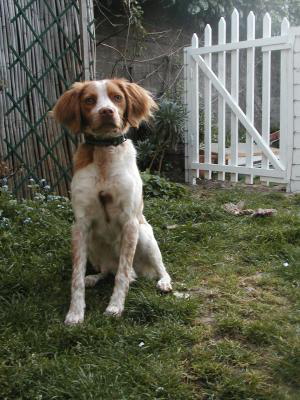

In [ ]:
from skimage import io # on charge le module permettant d'ouvrir des images
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


im = io.imread('talvi.jpg')
px.imshow(im)

- Les images sont manipulées sous forme de tableau à 2 (niveaux de gris) ou 3 dimensions (couleur). Le type python utilisé pour représenter ces tableaux est `ndarray` de la librairie numpy.

In [ ]:
print("type de données utilisé:", type(im))
print("nombre de dimensions de l'image:",im.ndim)
print("dimensions:", im.shape)

type de données utilisé: <class 'numpy.ndarray'>
nombre de dimensions de l'image: 3
dimensions: (400, 300, 3)


**Question 1:** Expliquez les dimensions affichée pour l'image d'exemple.

**Réponse 1:** L'image est en 3 dimensions, hauteur: 400 et largeur: 300, plans= 3 car c'est une image en couleur, chaque pixel peut hebergé 3 valeurs distinctes (3 couleurs) 

**Question 2:** Le code suivant transforme l'image d'origine en niveau de gris. Modifiez le afin d'afficher les dimensions de la nouvelle image. Cela correspond-t-il à ce que vous attendez ? Y a-t-il une différence entre les deux méthodes utilisées ? (si oui) pourquoi ?

**Réponse 2:** Les deux nouvelles images en gris ont tous les deux comme dimension hauteur 400, largeur 300 et dimension 2, cependant on remarque une différence au niveau des deux images correspondant à une moyenne de 4.314527777777777. En effet , la fonction rgb2gray convertit les images RVB en niveaux de gris en éliminant les informations de teinte et de saturation tout en conservant la luminance. Tandis qu'avec l'image Moyenne, on a réduit juste la dimension en 2, d'où la suppression des couleurs. 

nombre de dimensions de l'image gris 1: 2
dimensions de l'image gris 1: (400, 300)
nombre de dimensions de l'image gris 2: 2
dimensions: (400, 300)



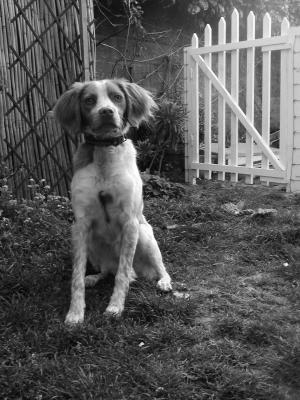


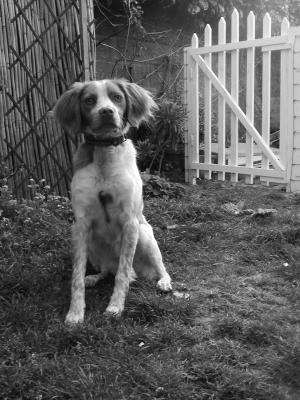

Moyenne des différences entre les deux images 4.314527777777777



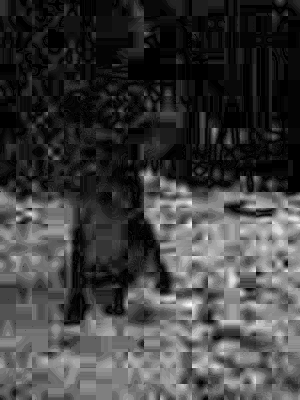

In [ ]:
from skimage import color # fonctions de conversion de couleur


# Traitement des images
im_gris1=im.mean(2)
im_gris2=(color.rgb2gray(im)*255).astype('uint8') #rgb2grey renvoie une image avec 0<= valeurs <=1
diff=abs(im_gris1-im_gris2)
print("nombre de dimensions de l'image gris 1:",im_gris1.ndim)
print("dimensions de l'image gris 1:", im_gris1.shape)
print("nombre de dimensions de l'image gris 2:",im_gris2.ndim)
print("dimensions:", im_gris2.shape)

# Affichage sous forme de différentes figures
fig = px.imshow(im_gris1, binary_string=True)
fig.update_layout( title_text="moyenne", title_x=0.5)
fig.show()

fig = px.imshow(im_gris2, binary_string=True)
fig.update_layout( title_text="rgb2grey", title_x=0.5)
fig.show()

print("Moyenne des différences entre les deux images", diff.mean())
fig = px.imshow(diff, binary_string=True)
fig.update_layout( title_text="différence", title_x=0.5)
fig.show()



## Quantification

### Comment ça marche ?

Fixer par exemple la variable `Q=8` pour le taux de quantification, puis lancer le script ci-dessous. Essayer pour diverse images (talvi, dégradés, etc.) et déterminer si, à Q identique la visibilité des dégradation dépend des images ou zones d'images.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.




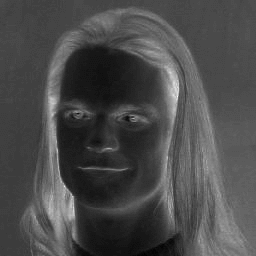
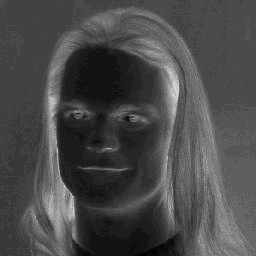

In [ ]:
import numpy as np # manipulation des ndarray

# Init 
Q=2
im = io.imread('talvi.jpg')
im2 = io.imread('low.png')

# Traitements 
im_gris=(color.rgb2gray(im)*255).astype('uint8')
im_requantifiee = Q * np.round(im_gris/Q)

im2_gris=(color.rgb2gray(im2)*255).astype('uint8')
im2_requantifiee = Q * np.round(im2_gris/Q)

# Affichage sous forme de différentes sous figures
fig = make_subplots(rows=1, cols=2, subplot_titles=("image de départ", "requantifié Q="+str(Q)))

sub = px.imshow(im_gris, binary_string=True)
sub = px.imshow(im2_gris, binary_string=True)
fig.add_trace( sub.data[0], row=1, col=1)

sub = px.imshow(im_requantifiee, binary_string=True)
sub = px.imshow(im2_requantifiee, binary_string=True)
fig.add_trace( sub.data[0], row=1, col=2)

**Question 3:** Visualiser l'effet de cette opération pour Q=2, puis Q=38 et Q=71.

**Réponse 3:** Avec Q=38, l'image est dégradé mais encore reconnaissable avec un effet "tache" sur les zones sombres de l'image. On voit que le constraste des différents couleurs devient de plus en plus accentué. 
Avec Q=71, l'image est complètement dégradé,voire méconnaisable, on arrive plus à distinguer que les grandes délimitations. Les zones de dégradation se situe surtout dans la partie gris. On perçoit plus et plus vite les dégradation dans l'image dégradé(low.png) que dans l'image "talvi.jpg"
En faisant varier Q, on fait varier le contraste de l'iamge.

**Question 4:** Montrer que cet algorithme réalise de la compression d'images avec perte.

**Réponse 4:** 
Cet algorithme réalise bien évidement une compression d'image car on réduit la redondance des données (ici des pixels) en regroupant les pixels qui ont un niveau de gris assez proche.
La compression réalisée est avec perte car on perçoit une dégradation de la qualité de l'image original après compression. (ex : à Q=71 on perçoit fortement cette dégradation) 

### Comment mesurer la dégradation ?

**Question 5:** Cette dégration visuelle (évaluation subjective de votre part) est-t-elle perceptible pour des quantifications (`Q`) faibles ?

On pourrait qualifier objectivement et numériquement la dégradation par différentes mesures d'erreur (cf. code ci-dessous).

**Réponse 5:** La perception de la dégradation visuelle dépend de l'image et des couleurs sur l'images. Par exemple pour "talvi.jpg", on ne perçoit pas les dégradations pour des quantifications faibles(Q=2) alors qu'on le perçoit avec "low.png" 

In [ ]:
from skimage import metrics # fonctions de mesure d'erreur

err_quad=metrics.mean_squared_error(im_gris, im_requantifiee)
print("erreur quadratique moyenne (mse):", err_quad)
psnr=metrics.peak_signal_noise_ratio(im_gris/255, im_requantifiee/255) # peak_signal_noise_ratio a besoin d'images avec des 0 <= valeur <=1
print("rapport signal bruit (psnr):", psnr)
ssim=metrics.structural_similarity(im_gris/255, im_requantifiee/255) # idem ici
print("similarité structurelle (ssim):", ssim)

erreur quadratique moyenne (mse): 0.501075
rapport signal bruit (psnr): 51.131776257225106
similarité structurelle (ssim): 0.9993801589136294


**Question 6:** Chercher la signification de chacune de ces mesures. De quelle manière doit on les interpréter ? Correspondent elle à votre évaluation subjective ? Est-ce que cette fidélité depend des images / zones d'images ?

In [ ]:
from skimage import metrics # fonctions de mesure d'erreur

err_quad=metrics.mean_squared_error(im2_gris, im2_requantifiee)
print("erreur quadratique moyenne (mse):", err_quad)
psnr=metrics.peak_signal_noise_ratio(im2_gris/255, im2_requantifiee/255) # peak_signal_noise_ratio a besoin d'images avec des 0 <= valeur <=1
print("rapport signal bruit (psnr):", psnr)
ssim=metrics.structural_similarity(im2_gris/255, im2_requantifiee/255) # idem ici
print("similarité structurelle (ssim):", ssim)

erreur quadratique moyenne (mse): 1.0
rapport signal bruit (psnr): 48.1308036086791
similarité structurelle (ssim): 0.9965220799786758


**Réponse 6:** On peut noter que les différentes valeurs obtenues: mse, psnr, ssim varient selon l'image. 

L'erreur quadratique moyenne ou mse est une mesure qui somme des différences au carrés des images (montre la difference de 2 images), et ne tient pas compte des zones d'images dégradés en spécifique mais la généralité

Le psnr permet de quantifier la performance des codeurs en mesurant la quanlité de reconstruction de l'image compressée par rapport à l'image d'origine.
Il fait une mesurer de différence de pixel à pixel.

Le ssim tient compte de l'organisation spacial des pixels et permet de mesurer la qualité visuelle d'une image compressée, par rapport à l'image original. Elle mesure la similarité de structure (qui est lié au fait que l'oeil humain est plus sensible aux changement dans la structure de l'image) plutot qu'une différencede pixel à pixel comme le fait le psnr.

On remarque que pour un Q faible, le mse est faible et le ssim est très proche de 1 tandis que plus le Q est élevé, plus le mse est élevé et plus le ssim s'éloigne de la valeur 1. 
Ces observations correspondent à mon évaluation subjective de l'image

## Histogramme, seuillage

Le script ci-dessous calcule et affiche l'histogramme des niveaux de gris d'une image, après quantification uniforme en N boites.

** Question 7:** Essayez les trois cas `N=256`, `N=50` et `N=10`. Pour plusieurs images de votre choix, faire le lien entre les régions de l'histogramme et les régions de l'image.

**Réponse 7:** 
Le paramètre N correspond au nombre de bar/rectangle qu'on voudrait afficher sur notre bar Chart.
En ordonnée : nombre de pixel
en abscisse :  valeur de niveau du gris

Après avoir effectuer plusiseurs tests sur des images différentes, les bars correspond aux valeurs de niveau du gris en fonction du nombre du pixel présent sur l'images.

Plus on a du blanc sur l'image, plus l'effectif sur la valeur maximal sur l'axe horizontal de notre histogramme est élevé. 
Et plus on a du noirs, plus l'effectif sur la valeurs minimal sur l'axe horizontal de notre histogramme est élevé

On remarque également que plus le nombre de boite est proche du nombre de pixel, plus l'histogramme est représentative de l'image . 

In [ ]:
from skimage import exposure

N = 10 # Expérimenter avec d'autres valeurs
im = io.imread('talvi.jpg') # Expérimenter avec d'autres images
im_gris=(color.rgb2gray(im)*255)

(histo, bin_centers)=exposure.histogram(im_gris,N)
print(histo.shape)
px.bar(x=bin_centers, y=histo, labels={
                     "x": "Intensité",
                     "y": "Nombre de pixels"})

(10,)


** Question 8: ** Que fait le petit script ci-dessous ? Quel est le rôle de la variable `SEUIL` (testez différentes valeurs) ?
La variable seuil regle la présence de noir. Plus le seuil est élevé, plus il y a de noir dans l'image 

**Réponse 8:** 
Le petit Script ci dessous transforme l'image en niveau de gris en une immagedont les valeurs de pixels ne peuvent avoir que la valeur 1 ou 0 (c'est a dire noir ou blanc). On obtient donc une image binaire ou image en noir et blanc.
Le role de la variable SEUIL est de définir la valeur à partir du quel les pixels ayant une valeur de niveau gris supérieur au SEUIL prendront tous la même valeur 1 et ceux qui ont une valeur en dessous prendront la valeur 0. 


** Question 9: ** Quel est le lien ente cette opération de seuillage et l'histogramme de l'image ? A quoi ressemble l'histogramme de l'image seuillée ? (vous pouvez ajouter du code pour l'afficher)


**Réponse 9:** 
Le seuillage est une opération qui consiste à saturer les pixels clairs (seuillage haut) ou sombres (seuillage bas) d’une image tout en laissant les autres inchangés.
L'histogramme d'un image seuillée ressemble à l'histogramme d'un image avec beaucoup de noir. 


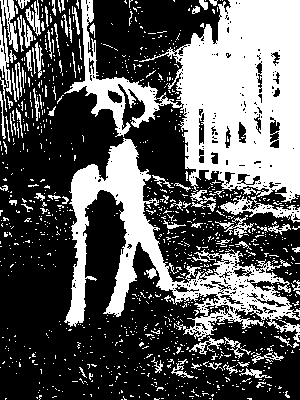

In [ ]:
SEUIL = 100

# une double boucle (lente)  pour effectuer notre traitement sur chaque pixel
im_thresholded = np.zeros( im_gris.shape )
largeur = im_gris.shape[1]
hauteur = im_gris.shape[0]

for y in range(0, hauteur):
    for x in range(0, largeur):
        if im_gris[y][x] > SEUIL:
            im_thresholded[y][x] = 255
        else:
            im_thresholded[y][x] = 0

# On peut aussi remplacer la double boucle précédente par ceci
#im_thresholded = (im_gris > SEUIL)*255

px.imshow(im_thresholded, binary_string=True)

** Question 10: ** Dans une nouvelle cellule de script, adaptez le programme précédent pour réaliser un effet "inverse vidéo" sur l'image originale (un pixel de sortie doit être d'autant plus foncé qu'il n'était clair en entrée).

In [ ]:
SEUIL = 100

# une double boucle (lente)  pour effectuer notre traitement sur chaque pixel
im_thresholded = np.zeros( im_gris.shape )
largeur = im_gris.shape[1]
hauteur = im_gris.shape[0]

for y in range(0, hauteur):
    for x in range(0, largeur):
        #on a qu'a inversé 255 et 0
        if im_gris[y][x] > SEUIL:
            im_thresholded[y][x] = 0
        else:
            im_thresholded[y][x] = 255

# On peut aussi remplacer la double boucle précédente par ceci
#im_thresholded = (im_gris > SEUIL)*255


# on cree
N=71
(histo, bin_centers)=exposure.histogram(im_thresholded,N)
# on affiche l'histogramme
print(histo.shape)
plt.bar(np.arange(N), histo)

plt.figure()
plt.imshow(im_thresholded, cmap=plt.cm.gray)

## Restauration par transformation de l'intensité : égalisation d'histogramme

L'objectif de cette opération est "d'améliorer" une image en transformant son contraste, c'est à dire d'exploiter "au mieux" la dynamique de luminance disponible.

**Question 11:** Exécuter le script ci-dessous et interprétez les résultats pour l'image `low.jpg`.

**Réponse 11:** 
Après égalisation, on obtient une image nettement meilleure que l'original. On peut remarquer qu'on a blanchit les pixels qui ont un niveau de gris proche du blanc et on a mis plus de contraste pour les pixels noirs


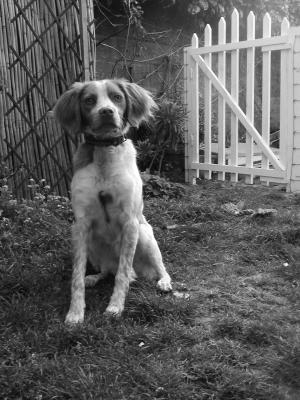
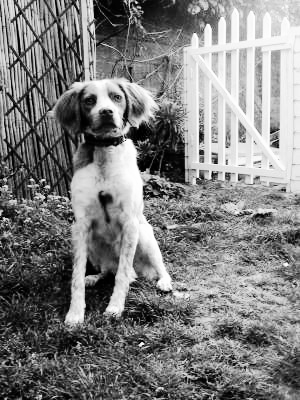

In [ ]:
from skimage import exposure
nb_bins=256

# Chargement de l'image
im_gris = io.imread('low.png') # Expérimenter avec d'autres images
im_gris=(color.rgb2gray(im)*255).astype('uint8') # transcodage de l'image en uint8 pour avec un histogramme discret

# Histogramme normal et cumulé de l'image de départ
im_gris_histo, im_gris_bins = exposure.histogram( im_gris, nb_bins )
im_gris_cumul, im_gris_cumul_bins = exposure.cumulative_distribution( im_gris, nb_bins )

# Egalisation + histogramme
im_eq = exposure.equalize_hist(im_gris,nb_bins)
im_eq_histo, im_eq_bins = exposure.histogram( im_eq, nb_bins )
im_eq_cumul, im_eq_cumul_bins = exposure.cumulative_distribution( im_eq, nb_bins )

# Affichage
fig = make_subplots(rows=3, cols=2, subplot_titles=("image de départ", "image égalisée", "histogramme", "histogramme","histogramme cumulé", "histogramme cumulé"), row_heights=[1, 0.5, 0.5])

fig.add_trace( px.imshow(im_gris, binary_string=True).data[0], row=1, col=1)
fig.add_trace( px.imshow(im_eq, binary_string=True).data[0], row=1, col=2)
fig.add_trace( go.Bar(x=im_gris_bins, y=im_gris_histo), row=2, col=1 )
fig.add_trace( go.Bar(x=im_eq_bins, y=im_eq_histo), row=2, col=2 )
fig.add_trace( go.Bar(x=im_gris_cumul_bins, y=im_gris_cumul), row=3, col=1 )
fig.add_trace( go.Bar(x=im_eq_cumul_bins, y=im_eq_cumul), row=3, col=2 )
fig['layout'].update(height=1000, showlegend=False)
fig.show()

**Question 12**: Pourquoi l'histogramme après égalisation n'est il pas tout à fait plat ?

**Réponse 12:** 
Après égalisation l'histogramme n'est pas tout a fait plat car on veut préserver l'ordre des niveaux des gris. On assiste à une amelioration visuel du contraste tel que l'humain le perçoit, en exploitant la diversité des niveau de gris
Chercher à dilaté les zones trop compréssé pour pouvoir récuperer plus d'information. Ainsi, les niveaux de gris comprenant peu de valeurs sont tassés et visible sur les extrémités de l'histogramme tandis que les niveaux de gris comprenant beaucoup de pixel sont étalés sur le milieu de l'histogramme. 
On obtient donc une histogramme cumulée proche de la diagonale. 


**Question 13:** Est-il correct d'affirmer que cette transformation s'écrit sous la forme $I_{sortie}(x,y)=transformation(I_{entree}(x,y))$ ?

**Réponse 13:** Oui, on a une image en entrée et une image en sortie dont on a fait varier le niveau de gris. Le but est de rectifier par un algorithme l'usage de gris qui transforme le niveau de gris entrant en un autre niveau de gris sortant plus sombre ou plus claire.
Le blanc reste blanc, le noir reste noir mais équilibre la presence de niveau de gris dans l'image

**Question 15:** La transformation est-elle linéaire ?

**Réponse 15:** Non, la transformation est non linéaire car si elle est linéaire, il n'y aura pas d'importance . Le but est d'éclaircir une image sous-exposer ou assombrir une image surexposer. 

**Question 16:** S'adapte-t-elle automatiquement à l'image traitée ?

**Réponse 16:** La transformation dépend de l'image à traiter.
On peut faire des statistiques mais n'est pas automatique car dépend de l'image(par exemple pour une image qui a tel caractéristique, on utilisera tel fonction,... )

**Question 17:** Selon vous, quels sont les contenus d'images pour lesquels l'égalisation d'histogramme est très (ou très peu) efficace ? Tentez d'en trouver sur le web et de leur appliquer l'algorithme d'égalisation.

**Réponse 17:** 
Je dirais que pour les images qui ont un contraste faible (resp. élevé), l'égalisation d'histogramme est très efficace (très peu efficace).

## Agrandissement d'image

La numérisation des images procède à une discrétisation spatiale, en posant une grille discrète de pixels sur une réalité initialement continue. De nombreuses tâches ont besoin de déterminer l'intensité de l'image en des coordonnées "non entières". Pour estimer cette intensité, on s'appuie souvent sur une hypothèse sur la fonction "luminance": sa continuité, continuité de sa dérivée, etc.

Le script ci-dessous agrandit une image selon deux méthodes : réplication et interpolation bilinéaire.


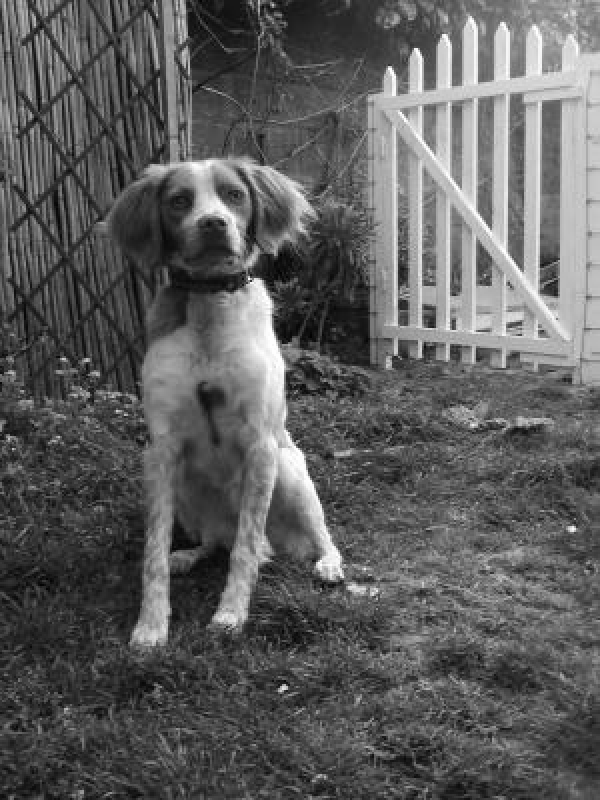
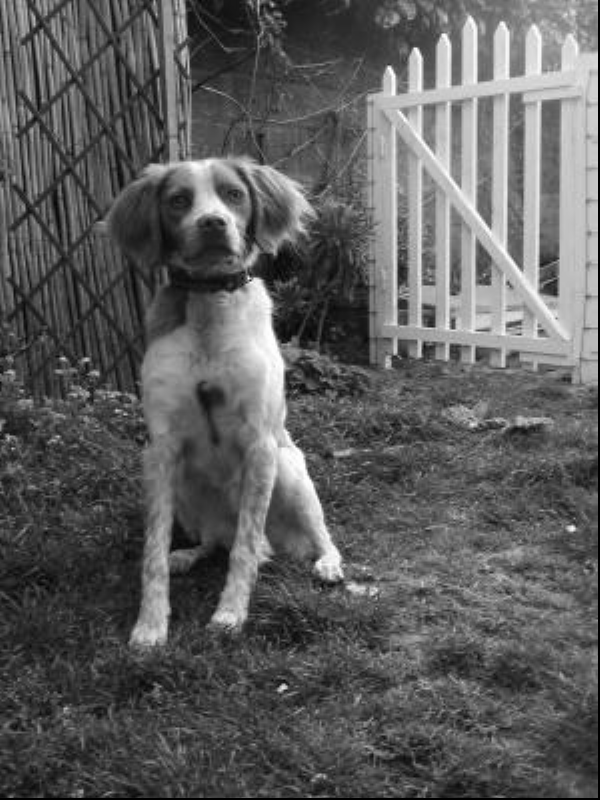

In [ ]:
# Chargement de l'image
im = io.imread('talvi.jpg') # Expérimenter avec d'autres images
im_gris=color.rgb2gray(im)*255

largeur = im_gris.shape[1]
hauteur = im_gris.shape[0]

# Réplication
im_2x_replic = np.zeros( (hauteur*2,largeur*2) )

for y in range(0, hauteur):
    for x in range(0, largeur):
        xx=2*x
        yy=2*y
        
        im_2x_replic[yy][xx] = im_gris[y][x]
        im_2x_replic[yy][xx+1] = im_gris[y][x]
        im_2x_replic[yy+1][xx] = im_gris[y][x]
        im_2x_replic[yy+1][xx+1] = im_gris[y][x]
        
# Interpolation bilinéaire
im_2x_bilin = np.zeros( (hauteur*2,largeur*2) )

for y in range(0, hauteur-1):
    for x in range(0, largeur-1):
        xx=2*x
        yy=2*y
        
        im_2x_bilin[yy][xx] = im_gris[y][x]
        im_2x_bilin[yy][xx+1] = 0.5*(im_gris[y][x]+im_gris[y][x+1])
        im_2x_bilin[yy+1][xx] = 0.5*(im_gris[y][x]+im_gris[y+1][x])
        im_2x_bilin[yy+1][xx+1] = 0.25*(im_gris[y][x]+im_gris[y][x+1]+im_gris[y+1][x]+im_gris[y+1][x+1])
        
# Affichage
fig = make_subplots(rows=1, cols=2, subplot_titles=("Réplication", "Interpolation bilinéaire"))
fig.add_trace( px.imshow(im_2x_replic, binary_string=True).data[0], row=1, col=1)
fig.add_trace( px.imshow(im_2x_bilin, binary_string=True).data[0], row=1, col=2)

**Question 18**: Comparez la complexité algorithmique des deux méthodes et leur rendu visuel (zoomez sur des parties bien contrastées de l'image)

**Réponse 18:** 
L’interpolation bilinéaire prend en compte les 4 voisins du pixel (appelé voisinage de Von Neumann) que l’on calcule, il applique une fonction bilinéaire (donc d’ordre 2) sur les 4 voisins puis applique le résultat sur le pixel interpolé.Cette technique donne des résultats plus doux que la technique du « plus proche ». Il permet d’obtenir des contours lisses mais produit également un léger effet de pixellisation. 
Tandis que la réplication veut doubler le nombre de pixels
en ligne et colonne, il y a alors des effets très visibles de pixellisation. 
L'interpolation bilinéaire est plus complexe que la réplication. 

**Question 19**: Comment faire une interpolation bilinéaire pour un zoom d'un facteur plus élevé que 2 ? (proposez une modification de l'algorithm initial)


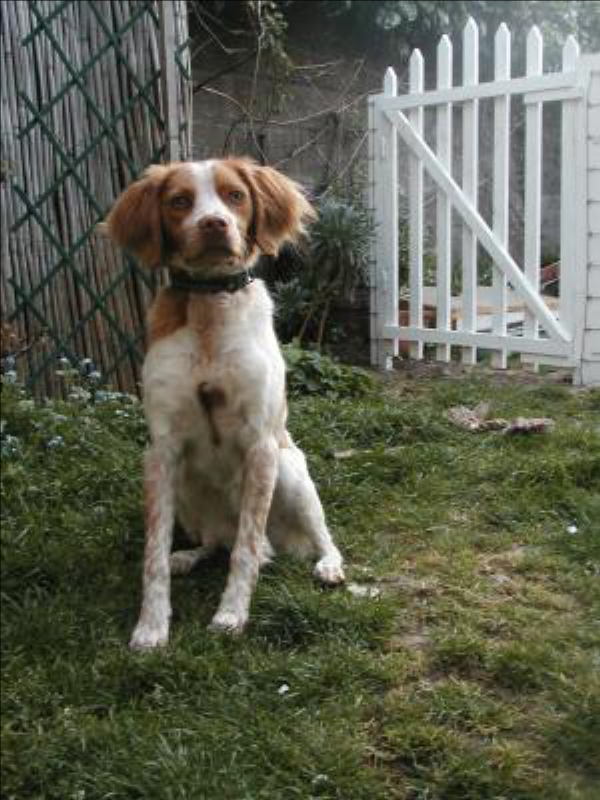

In [ ]:
# VOTRE CODE ICI 
# Poids inversement proportionnel à la distance 
#(2a+b)/3 pour les pixels interne

from PIL import Image
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np 
import math
def BiLinear_interpolation(img,dstH,dstW):
    scrH,scrW,_=img.shape
    img=np.pad(img,((0,1),(0,1),(0,0)),'constant')
    retimg=np.zeros((dstH,dstW,3),dtype=np.uint8)
    for i in range(dstH):
        for j in range(dstW):
            scrx=(i+1)*(scrH/dstH)-1
            scry=(j+1)*(scrW/dstW)-1
            x=math.floor(scrx)
            y=math.floor(scry)
            u=scrx-x
            v=scry-y
            retimg[i,j]=(1-u)*(1-v)*img[x,y]+u*(1-v)*img[x+1,y]+(1-u)*v*img[x,y+1]+u*v*img[x+1,y+1]
    return retimg
im_path='talvi.jpg'
image=np.array(Image.open(im_path))
image2=BiLinear_interpolation(image,image.shape[0]*2,image.shape[1]*2)
image2=Image.fromarray(image2.astype('uint8')).convert('RGB')
px.imshow(image2)


**Question 20**: Comment réduire par 2 les dimensions d'une image ? (proposez et mettez en oeuvre deux méthodes : l'une naive, et l'autre prenant en compte les considérations spectrales vues en traitement du signal)


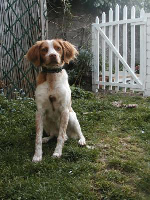

In [ ]:

from PIL import Image
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np 
import math
def BiLinear_interpolation(img,dstH,dstW):
    scrH,scrW,_=img.shape
    img=np.pad(img,((0,1),(0,1),(0,0)),'constant')
    retimg=np.zeros((dstH,dstW,3),dtype=np.uint8)
    for i in range(dstH):
        for j in range(dstW):
            scrx=(i+1)*(scrH/dstH)-1
            scry=(j+1)*(scrW/dstW)-1
            x=math.floor(scrx)
            y=math.floor(scry)
            u=scrx-x
            v=scry-y
            retimg[i,j]=(1-u)*(1-v)*img[x,y]+u*(1-v)*img[x+1,y]+(1-u)*v*img[x,y+1]+u*v*img[x+1,y+1]
    return retimg
im_path='talvi.jpg'
image=np.array(Image.open(im_path))
image2=BiLinear_interpolation(image,int(image.shape[0]/2),int(image.shape[1]/2))
image2=Image.fromarray(image2.astype('uint8')).convert('RGB')
px.imshow(image2)
